In [15]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import re
import matplotlib.pyplot as plt

In [16]:
data = {'weight': [92,70,58,99,55,76,62,92,71,70,77,79],
        'cholesterol': [4.8,5.1,6.4,6.5,2.3,5.7,4.2,6.9,4.8,4.8,7.7,5.7],
        'Exercise': [6,6,6,2,8,4,6,6,5,6,4,4],
        'Income': [2060,2660,2530,1740,3520,3750,2720,3130,2100,3340,2430,2700],
        'Happiness': [49,36,49,28,77,55,43,39,54,29,53,47],
         'Birthyear': [1953,1955,1939,1942,1989,1937,1979,1905,1995,1966,1938,1993]}

In [17]:
x = pd.DataFrame(data)

In [18]:
x['id']= np.arange(1,13,1)
x.set_index('id')

,weight,cholesterol,Exercise,Income,Happiness,Birthyear
id,,,,,,
1,92,4.8,6,2060,49,1953
2,70,5.1,6,2660,36,1955
3,58,6.4,6,2530,49,1939
4,99,6.5,2,1740,28,1942
5,55,2.3,8,3520,77,1989
6,76,5.7,4,3750,55,1937
7,62,4.2,6,2720,43,1979
8,92,6.9,6,3130,39,1905
9,71,4.8,5,2100,54,1995


In [19]:
xd = x.describe()
xd

,weight,cholesterol,Exercise,Income,Happiness,Birthyear,id
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,75.083333,5.408333,5.250000,2723.333333,46.583333,1957.583333,6.500000
std,13.813421,1.419000,1.544786,614.807188,13.283334,27.566311,3.605551
min,55.000000,2.300000,2.000000,1740.000000,28.000000,1905.000000,1.000000
25%,68.000000,4.800000,4.000000,2347.500000,38.250000,1938.750000,3.750000
50%,73.500000,5.400000,6.000000,2680.000000,48.000000,1954.000000,6.500000
75%,82.250000,6.425000,6.000000,3182.500000,53.250000,1981.500000,9.250000
max,99.000000,7.700000,8.000000,3750.000000,77.000000,1995.000000,12.000000


In [20]:
for index, row in x.iterrows():
    if row['Income'] > x['Income'].mean() :
        print('person',int(row['id']),'above average income')
    else:
        print('person',int(row['id']),'below average income')

person 1 below average income
person 2 below average income
person 3 below average income
person 4 below average income
person 5 above average income
person 6 above average income
person 7 below average income
person 8 above average income
person 9 below average income
person 10 above average income
person 11 below average income
person 12 below average income


In [22]:
x['Income']

0     2060
1     2660
2     2530
3     1740
4     3520
5     3750
6     2720
7     3130
8     2100
9     3340
10    2430
11    2700
Name: Income, dtype: int64

In [23]:
hours = pd.Series(x['weight'])

In [24]:
hours

0     92
1     70
2     58
3     99
4     55
5     76
6     62
7     92
8     71
9     70
10    77
11    79
Name: weight, dtype: int64

In [43]:
file = pd.read_csv('kd.csv',na_values=['?']).fillna(float('nan'))
file.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv       object
wbcc      object
rbcc      object
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

TypeError: arg must be a list, tuple, 1-d array, or Series

In [50]:
kd = pd.DataFrame(file)
kd.describe()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


##Eliminating all unwanted symbols from the dataset

```kd['age'] = kd['age'].map(lambda x: re.sub(r'\W+', '', x))
kd['bp'] = kd['bp'].map(lambda x: re.sub(r'\W+', '', x))
kd['sg'] = kd['sg'].map(lambda x: re.sub(r'\W+', '', x))
kd['al'] = kd['al'].map(lambda x: re.sub(r'\W+', '', x))
kd['su'] = kd['su'].map(lambda x: re.sub(r'\W+', '', x))
kd['rbc'] = kd['rbc'].map(lambda x: re.sub(r'\W+', '', x))
kd['pc'] = kd['pc'].map(lambda x: re.sub(r'\W+', '', x))
kd['pcc'] = kd['pcc'].map(lambda x: re.sub(r'\W+', '', x))
kd['ba'] = kd['ba'].map(lambda x: re.sub(r'\W+', '', x))
kd['bgr'] = kd['bgr'].map(lambda x: re.sub(r'\W+', '', x))
kd['bu'] = kd['bu'].map(lambda x: re.sub(r'\W+', '', x))
kd['sc'] = kd['sc'].map(lambda x: re.sub(r'\W+', '', x))
kd['sod'] = kd['sod'].map(lambda x: re.sub(r'\W+', '', x))
kd['pot'] = kd['pot'].map(lambda x: re.sub(r'\W+', '', x))
kd['hemo'] = kd['hemo'].map(lambda x: re.sub(r'\W+', '', x))
kd['pcv'] = kd['pcv'].map(lambda x: re.sub(r'\W+', '', x))
kd['wbcc'] = kd['wbcc'].map(lambda x: re.sub(r'\W+', '', x))
kd['rbcc'] = kd['rbcc'].map(lambda x: re.sub(r'\W+', '', x))
kd['htn'] = kd['htn'].map(lambda x: re.sub(r'\W+', '', x))
kd['dm'] = kd['dm'].map(lambda x: re.sub(r'\W+', '', x))
kd['cad'] = kd['cad'].map(lambda x: re.sub(r'\W+', '', x))
kd['appet'] = kd['appet'].map(lambda x: re.sub(r'\W+', '', x))
kd['pe'] = kd['pe'].map(lambda x: re.sub(r'\W+', '', x))
kd['ane'] = kd['ane'].map(lambda x: re.sub(r'\W+', '', x))
kd['class'] = kd['class'].map(lambda x: re.sub(r'\W+', '', x))```

In [28]:
kdf = kd
#Mapping all booleans values with 1 or 0 for calculation
#mymap = {'normal':1, 'abnormal':0, 'notpresent':0,'present':1,'yes':1,'no':0,'good':1,'poor':0,'no':0,'yes':1}
#kdf= kd.applymap(lambda s: mymap.get(s) if s in mymap else s)


In [46]:
#converting all datatypes from object dtype to float

"""
kdf['age']=pd.Series(kdf['age'])
kdf['age']=pd.to_numeric(kdf['age'], errors='coerce')

kdf['bp']=pd.Series(kdf['bp'])
kdf['bp']=pd.to_numeric(kdf['bp'], errors='coerce')

kdf['sg']=pd.Series(kdf['sg'])
kdf['sg']=pd.to_numeric(kdf['sg'], errors='coerce')

kdf['al']=pd.Series(kdf['al'])
kdf['al']=pd.to_numeric(kdf['al'], errors='coerce')

kdf['su']=pd.Series(kdf['su'])
kdf['sue']=pd.to_numeric(kdf['su'], errors='coerce')

kdf['rbc']=pd.Series(kdf['rbc'])
kdf['rbc']=pd.to_numeric(kdf['rbc'], errors='coerce')

kdf['pc']=pd.Series(kdf['pc'])
kdf['pc']=pd.to_numeric(kdf['pc'], errors='coerce')

kdf['pcc']=pd.Series(kdf['pcc'])
kdf['pcc']=pd.to_numeric(kdf['pcc'], errors='coerce')

kdf['ba']=pd.Series(kdf['ba'])
kdf['ba']=pd.to_numeric(kdf['ba'], errors='coerce')

kdf['bgr']=pd.Series(kdf['bgr'])
kdf['bgr']=pd.to_numeric(kdf['bgr'], errors='coerce')

kdf['bu']=pd.Series(kdf['bu'])
kdf['bu']=pd.to_numeric(kdf['bu'], errors='coerce')

kdf['sc']=pd.Series(kdf['sc'])
kdf['sc']=pd.to_numeric(kdf['sc'], errors='coerce')

kdf['sod']=pd.Series(kdf['sod'])
kdf['sod']=pd.to_numeric(kdf['sod'], errors='coerce')

kdf['pot']=pd.Series(kdf['pot'])
kdf['pot']=pd.to_numeric(kdf['pot'], errors='coerce')

kdf['hemo']=pd.Series(kdf['hemo'])
kdf['hemo']=pd.to_numeric(kdf['hemo'], errors='coerce')

kdf['pcv']=pd.Series(kdf['pcv'])
kdf['pcv']=pd.to_numeric(kdf['pcv'], errors='coerce')

kdf['wbcc']=pd.Series(kdf['wbcc'])
kdf['wbcc']=pd.to_numeric(kdf['wbcc'], errors='coerce')

kdf['rbcc']=pd.Series(kdf['rbcc'])
kdf['rbcc']=pd.to_numeric(kdf['rbcc'], errors='coerce')

kdf['htn']=pd.Series(kdf['htn'])
kdf['htn']=pd.to_numeric(kdf['htn'], errors='coerce')

kdf['dm']=pd.Series(kdf['dm'])
kdf['dm']=pd.to_numeric(kdf['dm'], errors='coerce')

kdf['cad']=pd.Series(kdf['cad'])
kdf['cad']=pd.to_numeric(kdf['cad'], errors='coerce')

kdf['appet']=pd.Series(kdf['appet'])
kdf['appet']=pd.to_numeric(kdf['appet'], errors='coerce')

kdf['pe']=pd.Series(kdf['pe'])
kdf['pe']=pd.to_numeric(kdf['pe'], errors='coerce')

kdf['ane']=pd.Series(kdf['ane'])
kdf['ane']=pd.to_numeric(kdf['ane'], errors='coerce')
"""

#kdf['class']=pd.Series(kdf['class'])
#kdf['class']=pd.to_numeric(kdf['class'], errors='coerce')

"\nkdf['age']=pd.Series(kdf['age'])\nkdf['age']=pd.to_numeric(kdf['age'], errors='coerce')\n\nkdf['bp']=pd.Series(kdf['bp'])\nkdf['bp']=pd.to_numeric(kdf['bp'], errors='coerce')\n\nkdf['sg']=pd.Series(kdf['sg'])\nkdf['sg']=pd.to_numeric(kdf['sg'], errors='coerce')\n\nkdf['al']=pd.Series(kdf['al'])\nkdf['al']=pd.to_numeric(kdf['al'], errors='coerce')\n\nkdf['su']=pd.Series(kdf['su'])\nkdf['sue']=pd.to_numeric(kdf['su'], errors='coerce')\n\nkdf['rbc']=pd.Series(kdf['rbc'])\nkdf['rbc']=pd.to_numeric(kdf['rbc'], errors='coerce')\n\nkdf['pc']=pd.Series(kdf['pc'])\nkdf['pc']=pd.to_numeric(kdf['pc'], errors='coerce')\n\nkdf['pcc']=pd.Series(kdf['pcc'])\nkdf['pcc']=pd.to_numeric(kdf['pcc'], errors='coerce')\n\nkdf['ba']=pd.Series(kdf['ba'])\nkdf['ba']=pd.to_numeric(kdf['ba'], errors='coerce')\n\nkdf['bgr']=pd.Series(kdf['bgr'])\nkdf['bgr']=pd.to_numeric(kdf['bgr'], errors='coerce')\n\nkdf['bu']=pd.Series(kdf['bu'])\nkdf['bu']=pd.to_numeric(kdf['bu'], errors='coerce')\n\nkdf['sc']=pd.Series(kdf

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,sue
0,48.0,80.0,1020.0,1.0,0,NaN,NaN,NaN,NaN,121.0,...,7800.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,ckd,0.0
1,7.0,50.0,1020.0,4.0,0,NaN,NaN,NaN,NaN,NaN,...,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ckd,0.0
2,62.0,80.0,1010.0,2.0,3,NaN,NaN,NaN,NaN,423.0,...,7500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ckd,3.0
3,48.0,70.0,1005.0,4.0,0,NaN,NaN,NaN,NaN,117.0,...,6700.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,ckd,0.0
4,51.0,80.0,1010.0,2.0,0,NaN,NaN,NaN,NaN,106.0,...,7300.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,ckd,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1020.0,0.0,0,NaN,NaN,NaN,NaN,140.0,...,6700.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,notckd,0.0
396,42.0,70.0,1025.0,0.0,0,NaN,NaN,NaN,NaN,75.0,...,7800.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,notckd,0.0
397,12.0,80.0,1020.0,0.0,0,NaN,NaN,NaN,NaN,100.0,...,6600.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,notckd,0.0
398,17.0,60.0,1025.0,0.0,0,NaN,NaN,NaN,NaN,114.0,...,7200.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,notckd,0.0


In [51]:
#Select all rows for peaple affected
kdff = kd.loc[kd['class'] == 'ckd']

In [52]:
kdff = pd.DataFrame(kdff)
kdff.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,240.00000,238.000000,207.000000,208.000000,205.000000,210.000000,235.000000,236.000000,166.000000,165.000000,203.000000
mean,54.42500,79.705882,1.013937,1.721154,0.770732,175.523810,72.656170,4.430720,133.882530,4.883030,10.652217
std,17.41142,15.244756,0.004630,1.375821,1.350788,92.476413,58.722957,6.977209,12.461811,4.347562,2.190174
min,2.00000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.500000,4.500000,2.500000,3.100000
25%,47.00000,70.000000,1.010000,0.000000,0.000000,106.250000,32.000000,1.400000,132.000000,3.800000,9.450000
50%,59.00000,80.000000,1.015000,2.000000,0.000000,143.500000,53.000000,2.250000,136.000000,4.300000,10.900000
75%,66.00000,90.000000,1.015000,3.000000,1.000000,219.750000,93.500000,4.600000,139.000000,4.900000,12.050000
max,90.00000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,16.100000


In [53]:
kdff.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
age,1.000000,0.144122,-0.048544,-0.020196,0.204776,0.160216,0.132041,0.079386,-0.026924,0.058805,-0.077130
bp,0.144122,1.000000,0.000183,-0.035352,0.141661,0.046097,0.098726,0.066857,0.020953,0.058271,-0.152156
sg,-0.048544,0.000183,1.000000,-0.015471,-0.084381,-0.078074,-0.079670,-0.134966,0.124610,-0.013684,0.079148
al,-0.020196,-0.035352,-0.015471,1.000000,0.074729,0.135475,0.314705,0.214615,-0.218827,0.094722,-0.299217
su,0.204776,0.141661,-0.084381,0.074729,1.000000,0.677268,0.045245,0.098650,0.096386,0.202059,0.105882
bgr,0.160216,0.046097,-0.078074,0.135475,0.677268,1.000000,-0.031664,-0.052850,-0.081869,0.029192,0.103096
bu,0.132041,0.098726,-0.079670,0.314705,0.045245,-0.031664,1.000000,0.542260,-0.191726,0.368048,-0.568305
sc,0.079386,0.066857,-0.134966,0.214615,0.098650,-0.052850,0.542260,1.000000,-0.679324,0.330104,-0.277334
sod,-0.026924,0.020953,0.124610,-0.218827,0.096386,-0.081869,-0.191726,-0.679324,1.000000,0.185381,0.126338
pot,0.058805,0.058271,-0.013684,0.094722,0.202059,0.029192,0.368048,0.330104,0.185381,1.000000,-0.159433


[Text(0, 0, 'age'),
 Text(0, 0, 'bp'),
 Text(0, 0, 'sg'),
 Text(0, 0, 'al'),
 Text(0, 0, 'bgr'),
 Text(0, 0, 'bu'),
 Text(0, 0, 'sc'),
 Text(0, 0, 'sod'),
 Text(0, 0, 'pot'),
 Text(0, 0, 'hemo')]

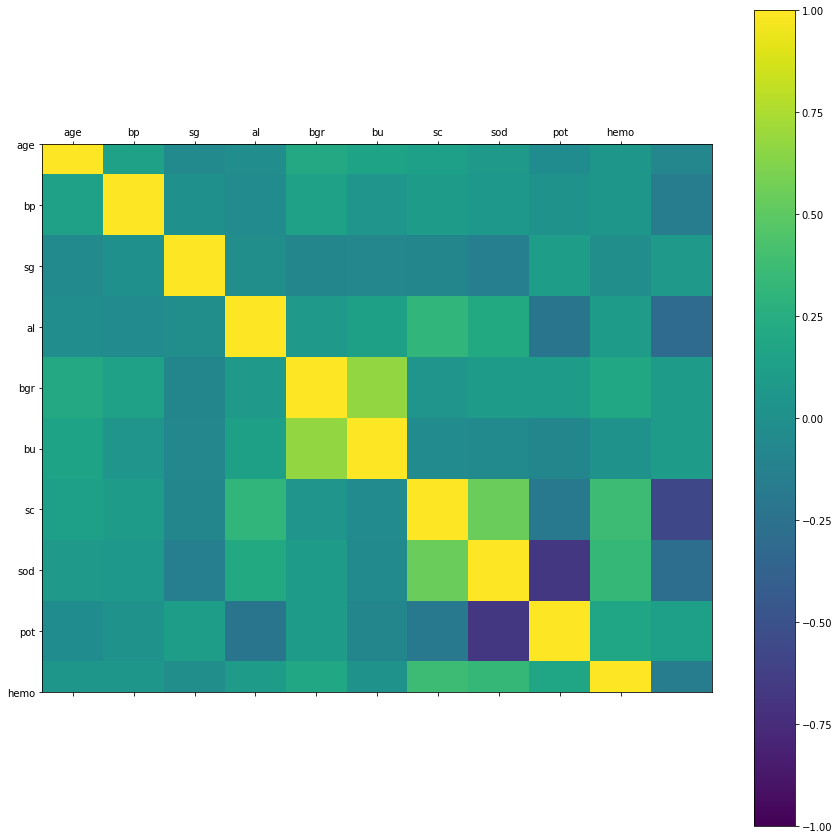

In [55]:
names = ['age','bp','sg','al','bgr','bu','sc','sod','pot','hemo','su']
correlations = kdff.corr()
# plot correlation matrix
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)